In [22]:
# imports
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data for training
# BASE = os.path.dirname(os.path.abspath('../RAW_recipes.csv'))
# file_path = os.path.join(BASE, 'raw_data', 'RAW_recipes.csv')

df= pd.read_csv('preprocessed.csv')
df.head(3)

,Unnamed: 0,steps,ingredients,n_ingredients,calories,fats,protein,carbs
0,0,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,2.0,4.0
1,1,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,22.0,1.0
2,2,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,39.0,5.0


In [5]:
X = df.drop(columns=['Unnamed: 0','steps','ingredients','n_ingredients']) 
X.head(3)

,calories,fats,protein,carbs
0,51.5,0.0,2.0,4.0
1,173.4,18.0,22.0,1.0
2,269.8,22.0,39.0,5.0


In [9]:
# data must be cnetered around its mean before applying PCA 
scaler = StandardScaler()
scaler.fit(X)
X_new = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_new

,calories,fats,protein,carbs
0,-0.355081,-0.463770,-0.558928,-0.141283
1,-0.252618,-0.232404,-0.216886,-0.177947
2,-0.171590,-0.180989,0.073849,-0.129062
3,-0.088965,-0.245257,-0.353703,0.054258
4,-0.101741,-0.450916,-0.541826,0.152028
...,...,...,...,...
231632,-0.049375,-0.129574,0.159360,-0.006849
231633,-0.385928,-0.463770,-0.576031,-0.177947
231634,-0.348608,-0.386648,-0.490520,-0.190168
231635,-0.240347,-0.322380,-0.473418,-0.080177


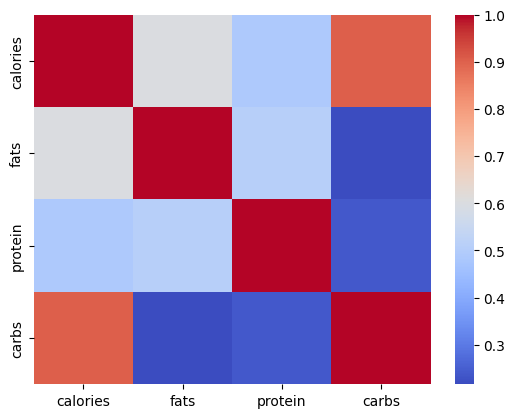

In [16]:
sns.heatmap(pd.DataFrame(X_new).corr(), cmap='coolwarm');

In [10]:
#don't think we need PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_new)

PCA()

In [13]:
W = pca.components_

W = pd.DataFrame(W.T,
                index= X.columns,
                columns=[f'PC{i}' for i in range(1,5)])
W.head(10)

,PC1,PC2,PC3,PC4
calories,0.608941,0.249997,0.089459,0.747456
fats,0.453146,-0.509402,0.675971,-0.279698
protein,0.424567,-0.538750,-0.723347,-0.079123
carbs,0.493551,0.622703,-0.108762,-0.597343


In [25]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=4)
km.fit(X_new)

/Users/seungmipark/.pyenv/versions/3.8.13/envs/guilty_pleasure/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
# The 16 centroids' coordinates (expressed in the space of PCs)
km.cluster_centers_.shape

(4, 4)

In [27]:
# The observations are classified automatically
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

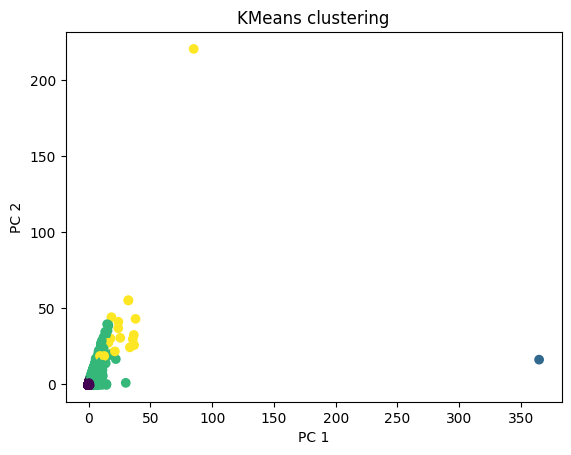

In [28]:
plt.scatter(X_new.iloc[:,0], X_new.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

/Users/seungmipark/.pyenv/versions/3.8.13/envs/guilty_pleasure/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seungmipark/.pyenv/versions/3.8.13/envs/guilty_pleasure/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seungmipark/.pyenv/versions/3.8.13/envs/guilty_pleasure/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seungmipark/.pyenv/versions/3.8.13/envs/guilty_pleasure/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defaul

Text(0.5, 0, 'k cluster number')

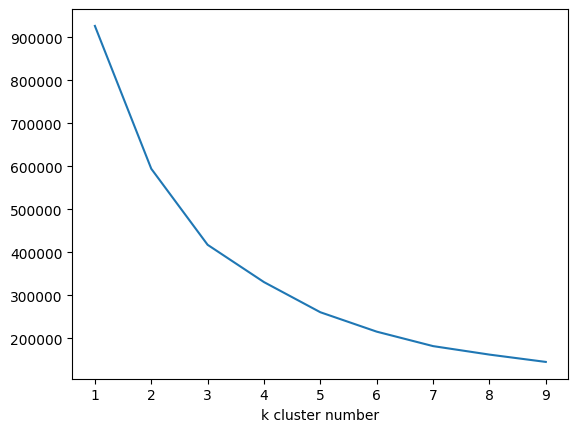

In [24]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')